In [1]:
!pip install --upgrade tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 20.5 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.15.1
    Uninstalling tensorboard-2.15.1:
      Successfully uninstalled tensorboard-2.15.1
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.15.0
    Uninstalling tensorflow-2.15.0:
      Successfully uninstalled tensorflow-2.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-decision-forests 1.8.1 requires wurlitzer, which is not installed.
tens

In [2]:
import tensorflow as tf
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
from matplotlib import pyplot as plt
import numpy as np

In [3]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [4]:
train_df = pd.read_csv('/kaggle/input/bttai-nybg-2024/BTTAIxNYBG-train.csv')
validation_df = pd.read_csv('/kaggle/input/bttai-nybg-2024/BTTAIxNYBG-validation.csv')
test_df = pd.read_csv('/kaggle/input/bttai-nybg-2024/BTTAIxNYBG-test.csv')

train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)


In [5]:
print(train_df.head())


   uniqueID           classLabel  classID source             imageFile
0         2   occluded-specimens        8      L  a1a8b48e8cb142b3.jpg
1         3    microscope-slides        6      L  79599db2ac9092b6.jpg
2         4  illustrations-color        2    BHL  c449696f2f0d0d92.jpg
3         5  illustrations-color        2      P  80a8f4a393b4e08c.jpg
4         6     animal-specimens        0     AK  041a1c6e73313638.jpg


In [6]:
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    directory='/kaggle/input/bttai-nybg-2024/BTTAIxNYBG-train/BTTAIxNYBG-train',
    x_col="imageFile",
    y_col="classLabel",
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical')

validation_generator = validation_datagen.flow_from_dataframe(
    dataframe=validation_df,
    directory='/kaggle/input/bttai-nybg-2024/BTTAIxNYBG-validation/BTTAIxNYBG-validation',
    x_col="imageFile",
    y_col="classLabel",
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical')


Found 81946 validated image filenames belonging to 10 classes.
Found 10244 validated image filenames belonging to 10 classes.


In [7]:
num_classes = len(train_generator.class_indices)

model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(256, 256, 3)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [8]:
pip install --upgrade tensorflow

Note: you may need to restart the kernel to use updated packages.


In [9]:
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_df) // 32, 
    epochs=20,
    validation_data=validation_generator,
    validation_steps=len(validation_df) // 32) 

Epoch 1/20


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1711266351.070427      77 service.cc:145] XLA service 0x7a630000a790 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1711266351.070470      77 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
2024-03-24 07:45:52.426781: E external/local_xla/xla/service/gpu/buffer_comparator.cc:149] Difference at 0: 5.22285, expected 4.50617
2024-03-24 07:45:52.426837: E external/local_xla/xla/service/gpu/buffer_comparator.cc:149] Difference at 19: 4.83523, expected 4.11855
2024-03-24 07:45:52.426847: E external/local_xla/xla/service/g

   1/2560 ━━━━━━━━━━━━━━━━━━━━ 6:00:33 8s/step - accuracy: 0.0312 - loss: 2.3495

I0000 00:00:1711266354.752214      77 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1109/2560 ━━━━━━━━━━━━━━━━━━━━ 10:24 430ms/step - accuracy: 0.6421 - loss: 4.3436

2024-03-24 07:53:52.338460: E external/local_xla/xla/service/gpu/buffer_comparator.cc:149] Difference at 0: 6.16963, expected 5.41021
2024-03-24 07:53:52.338523: E external/local_xla/xla/service/gpu/buffer_comparator.cc:149] Difference at 1: 6.17944, expected 5.42002
2024-03-24 07:53:52.338539: E external/local_xla/xla/service/gpu/buffer_comparator.cc:149] Difference at 20: 5.33829, expected 4.57887
2024-03-24 07:53:52.338551: E external/local_xla/xla/service/gpu/buffer_comparator.cc:149] Difference at 30: 6.5212, expected 5.76178
2024-03-24 07:53:52.338562: E external/local_xla/xla/service/gpu/buffer_comparator.cc:149] Difference at 31: 4.53269, expected 3.77327
2024-03-24 07:53:52.338569: E external/local_xla/xla/service/gpu/buffer_comparator.cc:149] Difference at 38: 6.35237, expected 5.59295
2024-03-24 07:53:52.338577: E external/local_xla/xla/service/gpu/buffer_comparator.cc:149] Difference at 40: 6.33219, expected 5.57277
2024-03-24 07:53:52.338585: E external/local_xla/xla/servi

2560/2560 ━━━━━━━━━━━━━━━━━━━━ 1272s 494ms/step - accuracy: 0.7313 - loss: 2.4481 - val_accuracy: 0.8667 - val_loss: 0.3905
Epoch 2/20
   1/2560 ━━━━━━━━━━━━━━━━━━━━ 1:01 24ms/step - accuracy: 0.8750 - loss: 0.3044

/opt/conda/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)
2024-03-24 08:06:58.204260: E external/local_xla/xla/service/gpu/buffer_comparator.cc:149] Difference at 129063: 5.35229, expected 4.67255
2024-03-24 08:06:58.204316: E external/local_xla/xla/service/gpu/buffer_comparator.cc:149] Difference at 129317: 4.6381, expected 3.95836
2024-03-24 08:06:58.204326: E external/local_xla/xla/service/gpu/buffer_comparator.cc:149] Difference at 129442: 5.36458, expected 4.68484
2024-03-24 08:06:58.204334: E external/local_xla/xla/service/gpu/buffer_comparator.cc:149] Difference at 129443: 5.7503, expected 5.07056
2024-03-24 08:06:58.204342: E external/local_xla/xla/service/gpu/buffer_comparator.cc:149] Difference at 129464: 5.45647, exp

2560/2560 ━━━━━━━━━━━━━━━━━━━━ 1s 424us/step - accuracy: 0.8750 - loss: 0.3044 - val_accuracy: 0.5000 - val_loss: 1.2491
Epoch 3/20
2560/2560 ━━━━━━━━━━━━━━━━━━━━ 833s 325ms/step - accuracy: 0.9211 - loss: 0.2355 - val_accuracy: 0.8679 - val_loss: 0.4118
Epoch 4/20
2560/2560 ━━━━━━━━━━━━━━━━━━━━ 0s 13us/step - accuracy: 0.9062 - loss: 0.2849 - val_accuracy: 0.7500 - val_loss: 0.5331
Epoch 5/20
2560/2560 ━━━━━━━━━━━━━━━━━━━━ 952s 371ms/step - accuracy: 0.9532 - loss: 0.1413 - val_accuracy: 0.8531 - val_loss: 0.5952
Epoch 6/20
2560/2560 ━━━━━━━━━━━━━━━━━━━━ 0s 13us/step - accuracy: 0.9062 - loss: 0.2265 - val_accuracy: 1.0000 - val_loss: 0.0994
Epoch 7/20
2560/2560 ━━━━━━━━━━━━━━━━━━━━ 1041s 406ms/step - accuracy: 0.9680 - loss: 0.1032 - val_accuracy: 0.8728 - val_loss: 0.5786
Epoch 8/20
2560/2560 ━━━━━━━━━━━━━━━━━━━━ 0s 30us/step - accuracy: 0.9688 - loss: 0.0372 - val_accuracy: 1.0000 - val_loss: 0.0424
Epoch 9/20
2560/2560 ━━━━━━━━━━━━━━━━━━━━ 1228s 479ms/step - accuracy: 0.9780 - los

In [10]:
test_df.head() 

,uniqueID,imageFile
0,1,facd4dcd8e869617.jpg
1,9,78c96bb2b2b62579.jpg
2,10,d292d2c4e0e6ad9d.jpg
3,14,3633494929870713.jpg
4,16,dc94b496c8e2d6c4.jpg


In [11]:
test_generator = test_datagen.flow_from_dataframe(
    dataframe=test_df,
    directory='/kaggle/input/bttai-nybg-2024/BTTAIxNYBG-test/BTTAIxNYBG-test',
    x_col="imageFile",
    y_col=None, 
    target_size=(256, 256),
    batch_size=32,
    class_mode=None,
    shuffle=False)

predictions = model.predict(test_generator)

Found 30690 validated image filenames.


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


959/960 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step

2024-03-24 10:54:04.182832: E external/local_xla/xla/service/gpu/buffer_comparator.cc:149] Difference at 0: 5.17171, expected 4.3613
2024-03-24 10:54:04.187061: E external/local_xla/xla/service/gpu/buffer_comparator.cc:149] Difference at 1: 6.10962, expected 5.29921
2024-03-24 10:54:04.187087: E external/local_xla/xla/service/gpu/buffer_comparator.cc:149] Difference at 2: 6.32575, expected 5.51534
2024-03-24 10:54:04.187100: E external/local_xla/xla/service/gpu/buffer_comparator.cc:149] Difference at 3: 6.90323, expected 6.09282
2024-03-24 10:54:04.187111: E external/local_xla/xla/service/gpu/buffer_comparator.cc:149] Difference at 6: 6.86856, expected 6.05815
2024-03-24 10:54:04.187121: E external/local_xla/xla/service/gpu/buffer_comparator.cc:149] Difference at 7: 6.58906, expected 5.77865
2024-03-24 10:54:04.187132: E external/local_xla/xla/service/gpu/buffer_comparator.cc:149] Difference at 8: 6.0516, expected 5.24119
2024-03-24 10:54:04.187142: E external/local_xla/xla/service/gpu

960/960 ━━━━━━━━━━━━━━━━━━━━ 425s 441ms/step


In [12]:
import numpy as np
import pandas as pd

predicted_class_labels = np.argmax(predictions, axis=1)

In [13]:
print(predicted_class_labels)

[1 7 4 ... 0 1 2]


(array([2789., 2981., 3169., 3246., 3092., 3080., 3076., 3304., 3079.,
        2874.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

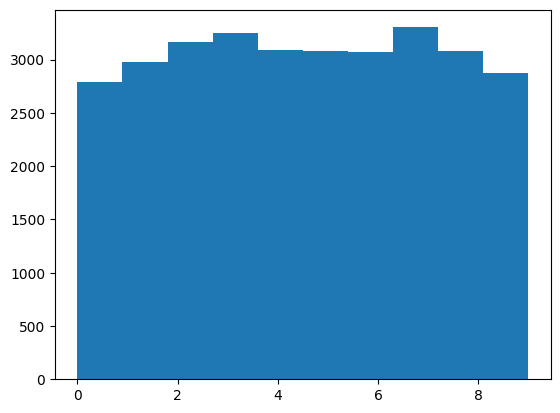

In [14]:
plt.hist(np.argmax(predictions, axis=1))

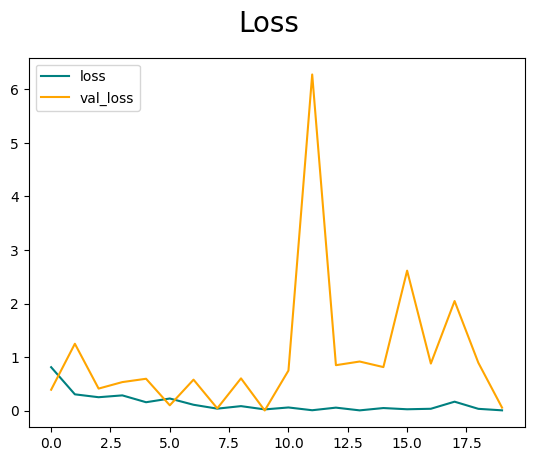

In [15]:
fig = plt.figure()
plt.plot(history.history['loss'], color='teal', label='loss')
plt.plot(history.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

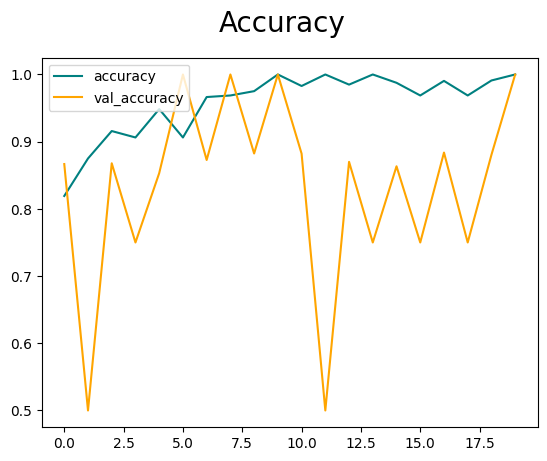

In [16]:
fig = plt.figure()
plt.plot(history.history['accuracy'], color='teal', label='accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [17]:

submission_df = pd.DataFrame({
    'uniqueID': test_df['uniqueID'],
    'classID': predicted_class_labels
})

submission_df.to_csv('BTTAIxNYBG-TerraTechXLA.csv', index=False)
print(submission_df.head())




   uniqueID  classID
0         1        1
1         9        7
2        10        4
3        14        1
4        16        6


In [18]:
submission_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30690 entries, 0 to 30689
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   uniqueID  30690 non-null  int64
 1   classID   30690 non-null  int64
dtypes: int64(2)
memory usage: 479.7 KB
